In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

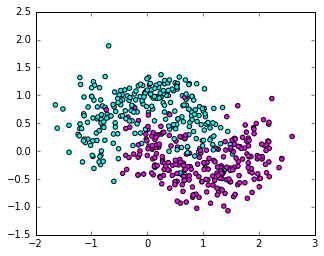

In [3]:
from sklearn.datasets import make_moons, make_circles

# make classification problem
X, y = make_moons(n_samples=500, noise=0.3)

# represent the coordinates in several convenient ways
I, J = X.T
IJ = X[:,:2]

plt.gca().set_aspect('equal')
plt.scatter(I, J, c=y, cmap='cool')

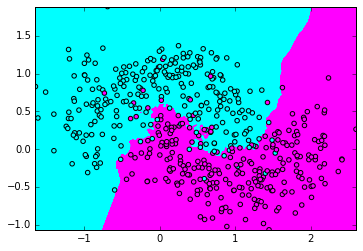

In [6]:
from scipy.spatial import cKDTree
from scipy import stats

# build a KDTree from the points
kdt = cKDTree(IJ)

# now make a grid; we will predict a class for each grid point
resolution = 2000
imin, imax = np.min(I), np.max(I)
jmin, jmax = np.min(J), np.max(J)
m = np.linspace(imin, imax, resolution)
n = np.linspace(jmin, jmax, resolution)
M, N = np.meshgrid(m,n)
MN = np.dstack((M,N)).reshape(-1,2)

# now find the k nearest neighbors for each grid point
dist, nabe = kdt.query(MN, k=7)

# find the class of each neighbor
k_classes = y[nabe]

# take a majority vote using the mode function
pred, _ = stats.mode(k_classes,axis=1)

pred_img = pred.reshape((resolution,resolution))

plt.gca().set_aspect('equal')
plt.scatter(I, J, c=y, cmap='cool')
plt.imshow(pred_img,origin='lower',cmap='cool',extent=[imin, imax, jmin, jmax])